# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
from citipy import citipy
import math
import numpy as np
import random
import sys
sys.path.append('../')
from api_keys import weather_api_key
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
import json
 

## Generate Cities List

In [70]:
#Create a list out of all the dictionary of coordinates : city object
city = citipy.WORLD_CITIES_DICT
#print(city[(40.7683333, -74.1458333)])

#Create list out of coordinate tuples that are keys to citipy dictionary
CityCoordinates = list(city.keys())


#print(len(CityCoordinates))
#CityCoordinates
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
#Variable to limit the number of API calls I can make at any one time so that my API key doesn't get locked again...
NumberOfCities = 20
#Essentially shuffle and shorten list to length of x
CityCoordinates = random.sample(CityCoordinates,NumberOfCities)
units = "imperial"

lat = 59.334591
lon = 18.063240


#print(len(CityCoordinates))
weather_data = {}
#url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"
#response = requests.get(url).json()
#print(f"{currentcity.city_name},{currentcity.country_code} the weather is: {response['main']['temp']}")
responses = []
for i in CityCoordinates:
    lat = i[0]
    lon = i[-1]
    currentcity = citipy.nearest_city(lat,lon)
    
    country = currentcity.country_code 
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units={units}"
    response = requests.get(url).json()
     
    print(f"{currentcity.city_name}, {country} the weather is: {response['main']['temp']}")
    location = f"{currentcity.city_name}, {country}"
    weather_data[location] = response['main']['temp']
    responses.append(response)

weather_data

malveira, pt the weather is: 60.69
kastella, gr the weather is: 56.39
lakewood, us the weather is: 42.84
dornesti, ro the weather is: 46.62
ipero, br the weather is: 71.6
brodek u prerova, cz the weather is: 53.98
dumbraveni, ro the weather is: 46.2
la palma, pa the weather is: 81.59
imeni vorovskogo, ru the weather is: 42.8
niort, fr the weather is: 54
hurricane, us the weather is: 72.63
el guantillo, hn the weather is: 73.15
stekene, be the weather is: 53.28
capaci, it the weather is: 61.99
san vicente, ph the weather is: 79.65
colon, cu the weather is: 75.2
brosteni, ro the weather is: 55.58
lugo, it the weather is: 55.33
pucheni, ro the weather is: 41.02
dunafoldvar, hu the weather is: 52.2


{'malveira, pt': 60.69,
 'kastella, gr': 56.39,
 'lakewood, us': 42.84,
 'dornesti, ro': 46.62,
 'ipero, br': 71.6,
 'brodek u prerova, cz': 53.98,
 'dumbraveni, ro': 46.2,
 'la palma, pa': 81.59,
 'imeni vorovskogo, ru': 42.8,
 'niort, fr': 54,
 'hurricane, us': 72.63,
 'el guantillo, hn': 73.15,
 'stekene, be': 53.28,
 'capaci, it': 61.99,
 'san vicente, ph': 79.65,
 'colon, cu': 75.2,
 'brosteni, ro': 55.58,
 'lugo, it': 55.33,
 'pucheni, ro': 41.02,
 'dunafoldvar, hu': 52.2}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
#weather_data
humidities = []
latitudes = []
longitudes = []
wind_speeds = []
cloudiness = []
for i in responses:
    
    humidities.append(i['main']['humidity'])
    latitudes.append(i['coord']['lat'])
    longitudes.append(i['coord']['lon'])
    wind_speeds.append(i['wind']['speed'])
    cloudiness.append(i['clouds']['all'])
    #print(json.dumps(i, indent = 1)) 


weather_df = pd.DataFrame(columns=['Temperature','Locations', 'Humidity', 'Latitude', 
                        'Longitude','Wind Speed', 'Cloudiness'])
weather_df["Temperature"] = weather_data.values()
weather_df["Locations"] = weather_data.keys()
weather_df["Humidity"] = humidities
weather_df["Latitude"] = latitudes
weather_df["Longitude"] = longitudes
weather_df["Wind Speed"] = wind_speeds
weather_df["Cloudiness"] = cloudiness
weather_df

,Temperature,Locations,Humidity,Latitude,Longitude,Wind Speed,Cloudiness
0,60.69,"malveira, pt",93,38.93,-9.26,12.75,75
1,56.39,"kastella, gr",93,38.57,23.63,2.13,40
2,42.84,"lakewood, us",48,41.48,-81.80,16.11,90
3,46.62,"dornesti, ro",81,47.87,26.02,6.93,75
4,71.60,"ipero, br",43,-23.35,-47.68,17.22,20
5,53.98,"brodek u prerova, cz",99,49.48,17.34,1.99,100
6,46.20,"dumbraveni, ro",87,46.23,24.57,4.70,90
7,81.59,"la palma, pa",73,8.40,-78.15,12.39,72
8,42.80,"imeni vorovskogo, ru",100,55.73,38.32,6.71,90
9,54.00,"niort, fr",87,46.32,-0.46,3.00,99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
#  Get the indices of cities that have humidity over 100%.
indexes = []
current = 0
for i in responses:
    
    #print(f"The humidity is: {i['main']['humidity']}")
    if i['main']['humidity'] > 100:
        indexes.append(current)
        current+=1
        
indexes  

[]

In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(indexes)
weather_df

,Temperature,Locations,Humidity,Latitude,Longitude,Wind Speed,Cloudiness
0,60.69,"malveira, pt",93,38.93,-9.26,12.75,75
1,56.39,"kastella, gr",93,38.57,23.63,2.13,40
2,42.84,"lakewood, us",48,41.48,-81.80,16.11,90
3,46.62,"dornesti, ro",81,47.87,26.02,6.93,75
4,71.60,"ipero, br",43,-23.35,-47.68,17.22,20
5,53.98,"brodek u prerova, cz",99,49.48,17.34,1.99,100
6,46.20,"dumbraveni, ro",87,46.23,24.57,4.70,90
7,81.59,"la palma, pa",73,8.40,-78.15,12.39,72
8,42.80,"imeni vorovskogo, ru",100,55.73,38.32,6.71,90
9,54.00,"niort, fr",87,46.32,-0.46,3.00,99


In [75]:
weather_df.to_csv('weather.csv') 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

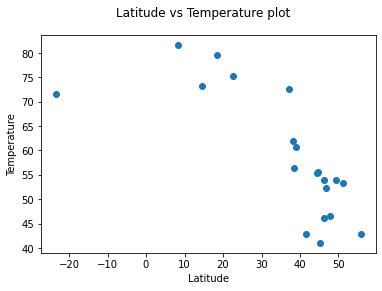

In [76]:
plt.scatter(weather_df['Latitude'],weather_df['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.suptitle("Latitude vs Temperature plot")
plt.savefig("LatTempScatter.png")
plt.show()

## Latitude vs. Humidity Plot

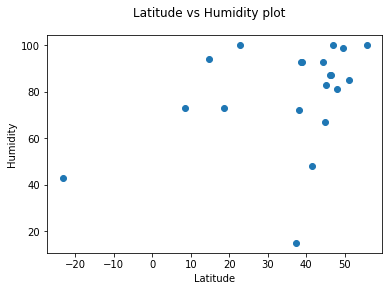

In [77]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.suptitle("Latitude vs Humidity plot")
plt.savefig("LatHumidityScatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

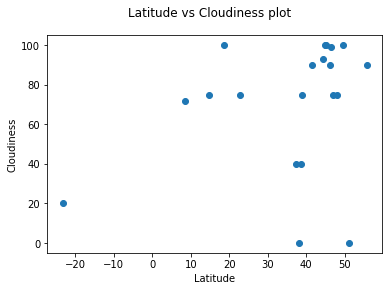

In [78]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.suptitle("Latitude vs Cloudiness plot")
plt.savefig("LatCloudinessScatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

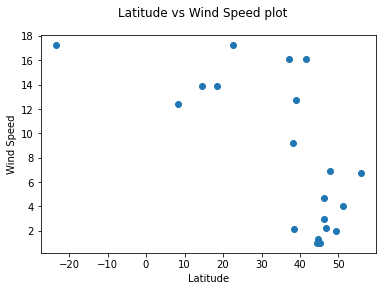

In [79]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.suptitle("Latitude vs Wind Speed plot")
plt.savefig("LatWindSpeedScatter.png")
plt.show()

## Linear Regression

In [80]:
#df.loc[df['shield'] > 35] = 0

NorthernHemisphere = weather_df['Latitude'].loc[weather_df['Latitude'] >= 0]
NorthernIndexes = NorthernHemisphere.index

SouthernHemisphere = weather_df['Latitude'].loc[weather_df['Latitude'] < 0]
SouthernIndexes = SouthernHemisphere.index


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0     36.483920
1     40.371178
2     52.620560
3     49.203389
5     42.549850
6     49.583075
7     17.590038
8     52.656721
9     42.531770
10    25.689999
11    25.219912
12    43.182660
13    35.308702
14    19.343824
15    23.366684
16    41.103429
17    41.329432
18    54.265865
19    44.158994
Name: Temperature, dtype: float64
y = -0.9x +91.35


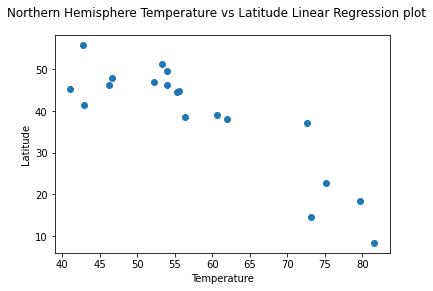

In [81]:
plt.scatter(weather_df['Temperature'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Temperature vs Latitude Linear Regression plot")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Temperature'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])


regress_values = weather_df['Temperature'][NorthernIndexes] * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

4   NaN
Name: Temperature, dtype: float64
y = nanx +nan


/Users/jbeachy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/jbeachy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/jbeachy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


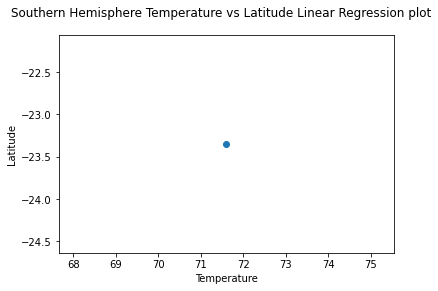

In [82]:
plt.scatter(weather_df['Temperature'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Temperature vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Temperature'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

regress_values = weather_df['Temperature'][SouthernIndexes] * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0     39.671969
1     39.671969
2     36.215123
3     38.750143
5     40.132882
6     39.211056
7     38.135593
8     40.209701
9     39.211056
10    33.680103
11    39.748788
12    39.057419
13    38.058774
14    38.135593
15    40.209701
16    37.674680
17    39.671969
18    38.903781
19    40.209701
Name: Humidity, dtype: float64
y = 0.08x +32.53


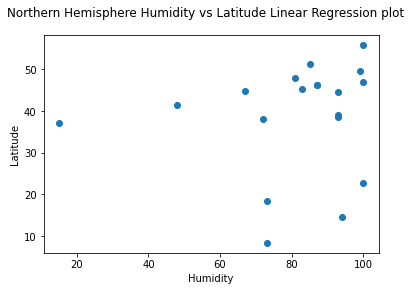

In [83]:
plt.scatter(weather_df['Humidity'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Humidity vs Latitude Linear Regression plot")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Humidity'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Humidity'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

4   NaN
Name: Humidity, dtype: float64
y = nanx +nan


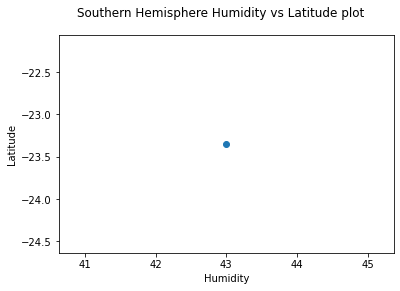

In [84]:
plt.scatter(weather_df['Humidity'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Humidity vs Latitude plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Humidity'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])


regress_values = weather_df['Humidity'][SouthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0     38.769255
1     38.714969
2     38.792520
3     38.769255
5     38.808030
6     38.792520
7     38.764602
8     38.792520
9     38.806479
10    38.714969
11    38.769255
12    38.652929
13    38.652929
14    38.808030
15    38.769255
16    38.808030
17    38.797173
18    38.808030
19    38.769255
Name: Cloudiness, dtype: float64
y = 0.0x +38.65


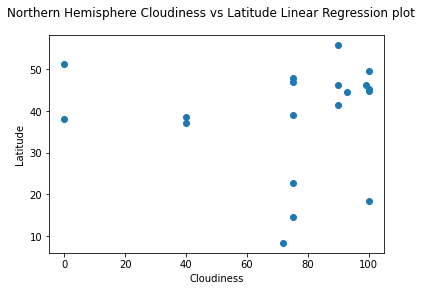

In [85]:
plt.scatter(weather_df['Cloudiness'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Cloudiness vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Cloudiness'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Cloudiness'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

4   NaN
Name: Cloudiness, dtype: float64
x = 0


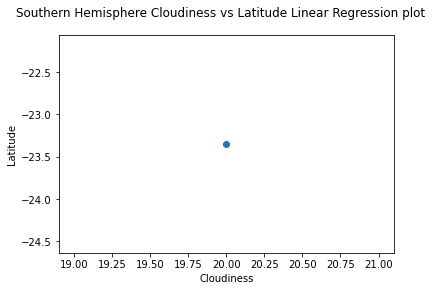

In [86]:
plt.scatter(weather_df['Cloudiness'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Cloudiness vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Cloudiness'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

regress_values = weather_df['Cloudiness'][SouthernIndexes] * slope + intercept
print(regress_values)

 
 
if math.isnan(slope):
    print(f"x = 0")
else:
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0     31.461508
1     46.866652
2     26.587564
3     39.903875
5     47.069733
6     43.138665
7     31.983716
8     40.223002
9     45.604648
10    26.587564
11    29.836860
12    44.154070
13    36.654579
14    29.807848
15    24.977422
16    48.012609
17    48.491300
18    48.491300
19    46.707088
Name: Wind Speed, dtype: float64
y = -1.45x +49.96


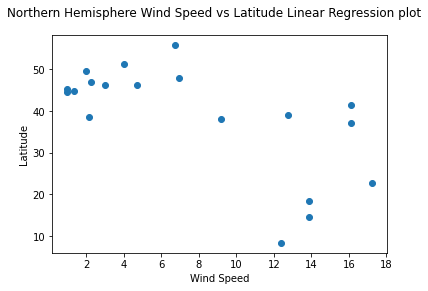

In [87]:
plt.scatter(weather_df['Wind Speed'][NorthernIndexes],weather_df['Latitude'][NorthernIndexes])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.suptitle("Northern Hemisphere Wind Speed vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Wind Speed'][NorthernIndexes], 
                                            weather_df['Latitude'][NorthernIndexes])

regress_values = weather_df['Wind Speed'][NorthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

4   NaN
Name: Wind Speed, dtype: float64
y = nanx +nan


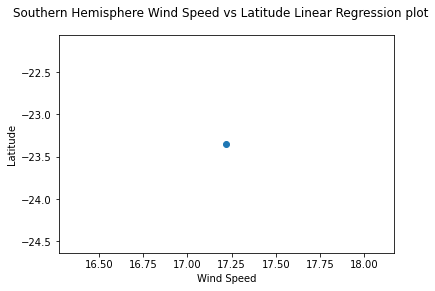

In [88]:
plt.scatter(weather_df['Wind Speed'][SouthernIndexes],weather_df['Latitude'][SouthernIndexes])
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.suptitle("Southern Hemisphere Wind Speed vs Latitude Linear Regression plot")


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_df['Wind Speed'][SouthernIndexes], 
                                            weather_df['Latitude'][SouthernIndexes])

regress_values = weather_df['Wind Speed'][SouthernIndexes] * slope + intercept
print(regress_values)


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.show()